In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.stats.api as sms

In [40]:
df = pd.read_csv("country_wise_latest.csv")
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [41]:
df.dtypes

Country/Region             object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
1 week % increase         float64
WHO Region                 object
dtype: object

In [4]:
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [8]:
df.shape     # 187 rows and 15 columns

(187, 15)

In [9]:
df["WHO Region"].value_counts()

WHO Region
Europe                   56
Africa                   48
Americas                 35
Eastern Mediterranean    22
Western Pacific          16
South-East Asia          10
Name: count, dtype: int64

In [44]:
df.groupby("WHO Region")["Deaths"].max()

WHO Region
Africa                     7067
Americas                 148011
Eastern Mediterranean     15912
Europe                    45844
South-East Asia           33408
Western Pacific            4656
Name: Deaths, dtype: int64

* **As this Insights shows us that Highest death count on a single day happened in "Americas" due to Covid-19 with the death count of *148011***


* **Second highest is the "Europe" With *45844* deaths in particular day**

In [49]:
mean_death = df.groupby("WHO Region")["Deaths"].mean()
mean_death

WHO Region
Africa                    254.645833
Americas                 9792.342857
Eastern Mediterranean    1742.681818
Europe                   3770.428571
South-East Asia          4134.900000
Western Pacific           515.562500
Name: Deaths, dtype: float64

* **If we look at tha data then we come to know that on an avg. "South East asia" has a highest death rates.**

In [50]:
mean_recovered = df.groupby("WHO Region")["Recovered"].mean()
mean_recovered

WHO Region
Africa                     9180.104167
Americas                 127674.742857
Eastern Mediterranean     54609.090909
Europe                    35602.196429
South-East Asia          115693.300000
Western Pacific           12923.125000
Name: Recovered, dtype: float64

In [53]:
ratio_of_death_to_recovered = mean_death/mean_recovered*100
ratio_of_death_to_recovered

WHO Region
Africa                    2.773888
Americas                  7.669757
Eastern Mediterranean     3.191194
Europe                   10.590438
South-East Asia           3.574019
Western Pacific           3.989457
dtype: float64

* **The ratio of Death_to_Recovered is high for the "Europe" which means it has higher death rates compared to recovered**

* **We can See that on an average the recovery rate of Americas are very high compared to other countries**

## Data Visualisation

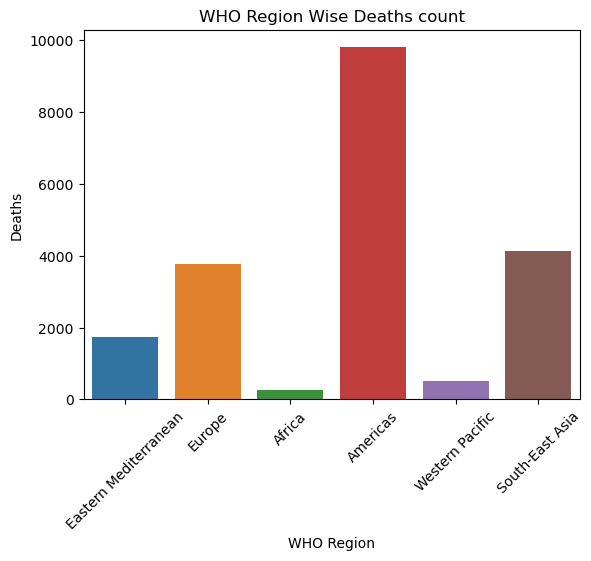

In [10]:
sns.barplot(data = df,x = df["WHO Region"],y= df["Deaths"],errorbar = None,)
plt.title("WHO Region Wise Deaths count")
plt.xticks(rotation = 45)
plt.show()

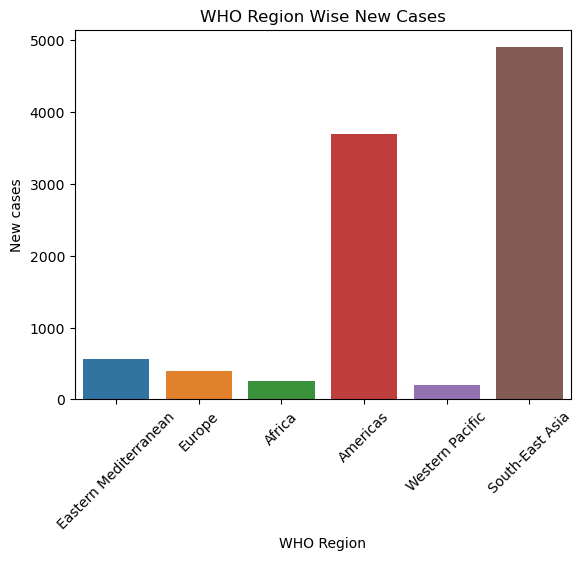

In [11]:
sns.barplot(data = df,x = df["WHO Region"],y= df["New cases"],errorbar = None,)
plt.title("WHO Region Wise New Cases")
plt.xticks(rotation = 45)
plt.show()

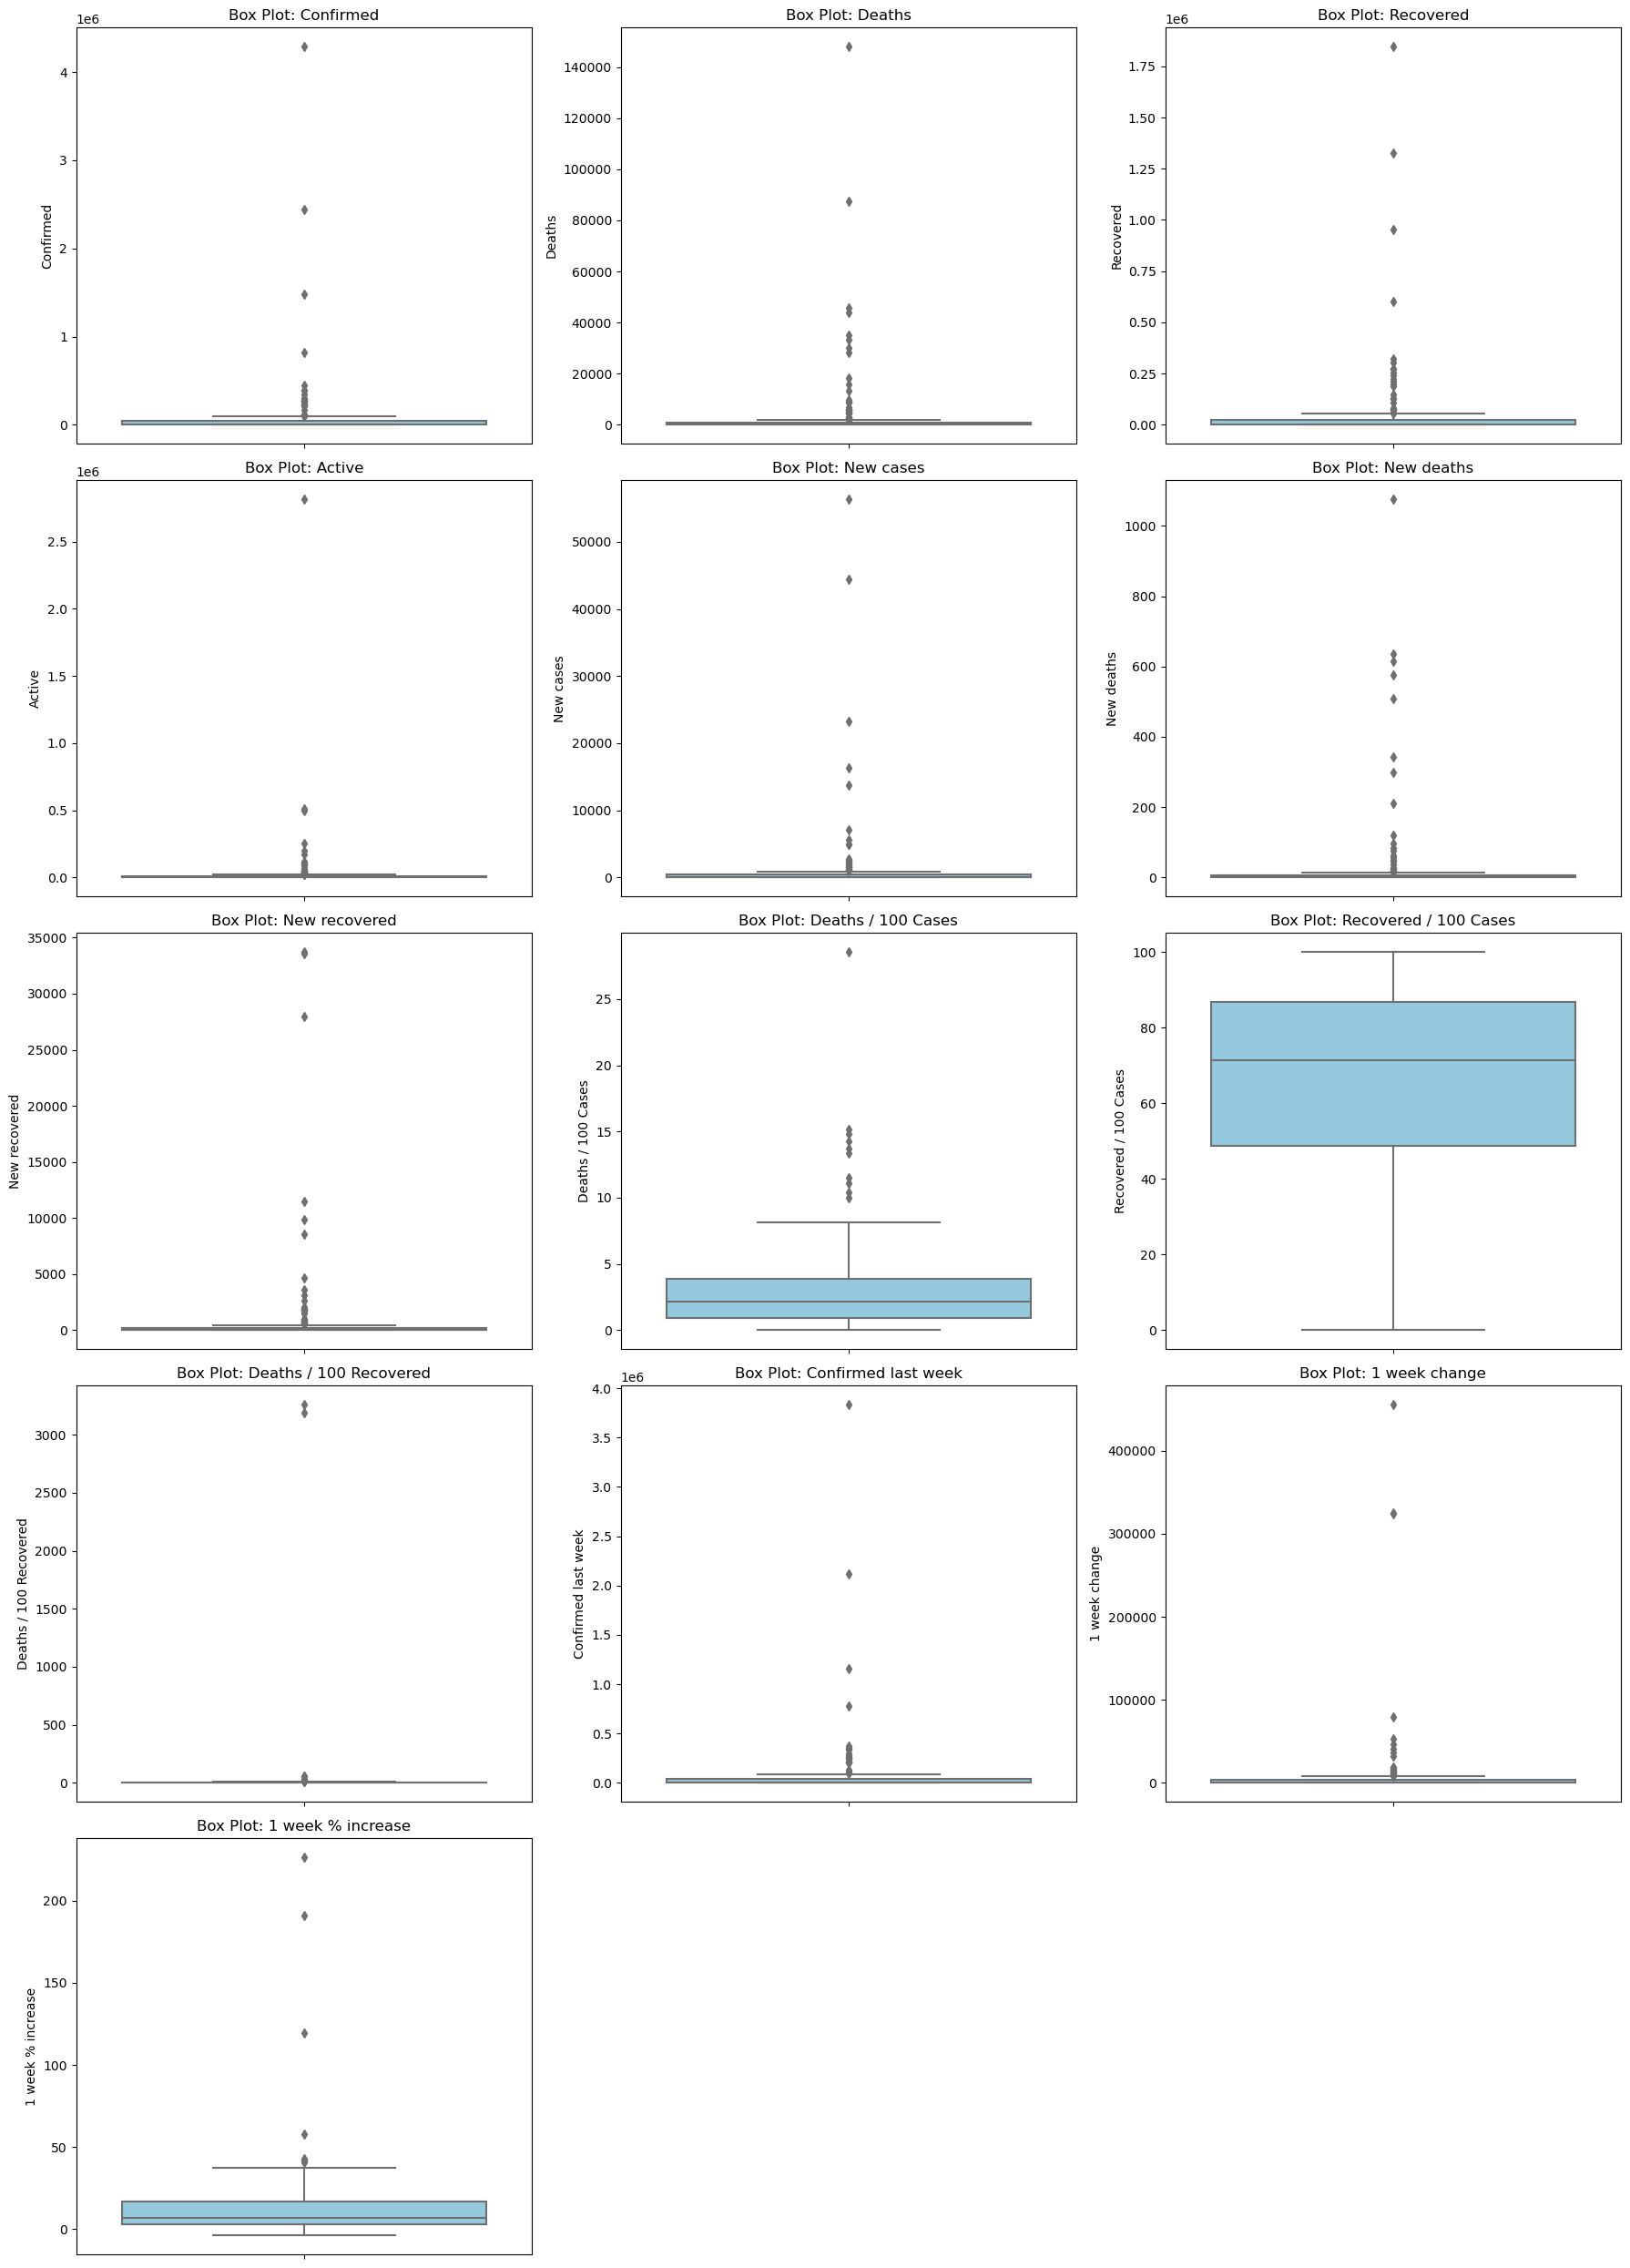

In [26]:
numeric_df = df.select_dtypes(include='number')
num_cols = numeric_df.shape[1]
import warnings
warnings.filterwarnings("ignore")
cols_per_row = 3
rows = (num_cols + cols_per_row - 1) // cols_per_row

# Create subplots
plt.figure(figsize=(18, 5 * rows))
for idx, column in enumerate(numeric_df.columns, 1):
    plt.subplot(rows, cols_per_row, idx)
    sns.boxplot(y=numeric_df[column], color="skyblue")
    plt.title(f'Box Plot: {column}')
    plt.tight_layout()

plt.show()

* **We can see that most of the columns consists of outlier which leads to affect the model performance,hence it it important to handle this outliers**

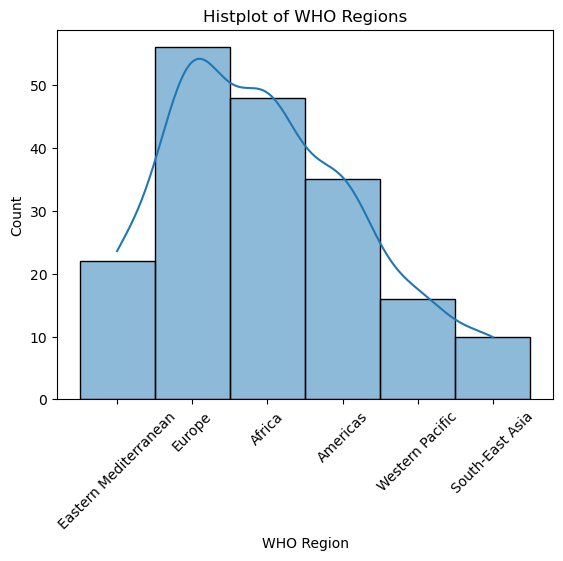

In [30]:
sns.histplot(data = df,x = df["WHO Region"],kde = True)
plt.xticks(rotation = 45)
plt.title("Histplot of WHO Regions")
plt.show()

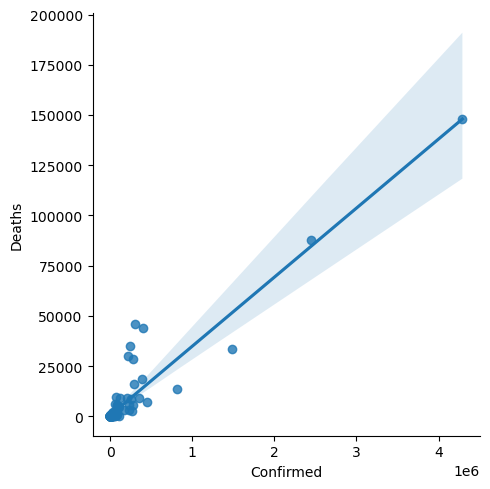

In [35]:
sns.lmplot(data =df,x = "Confirmed",y = "Deaths")
plt.show()

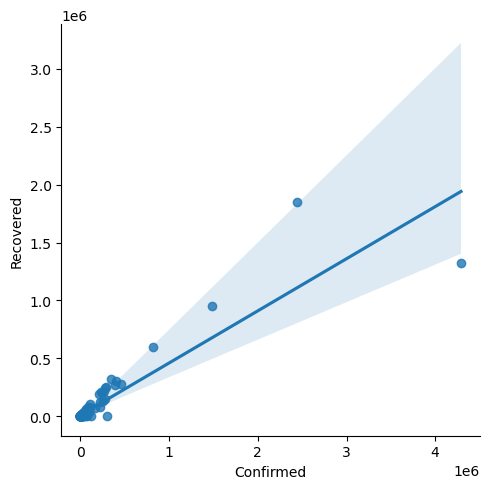

In [36]:
sns.lmplot(data =df,x = "Confirmed",y = "Recovered")
plt.show()

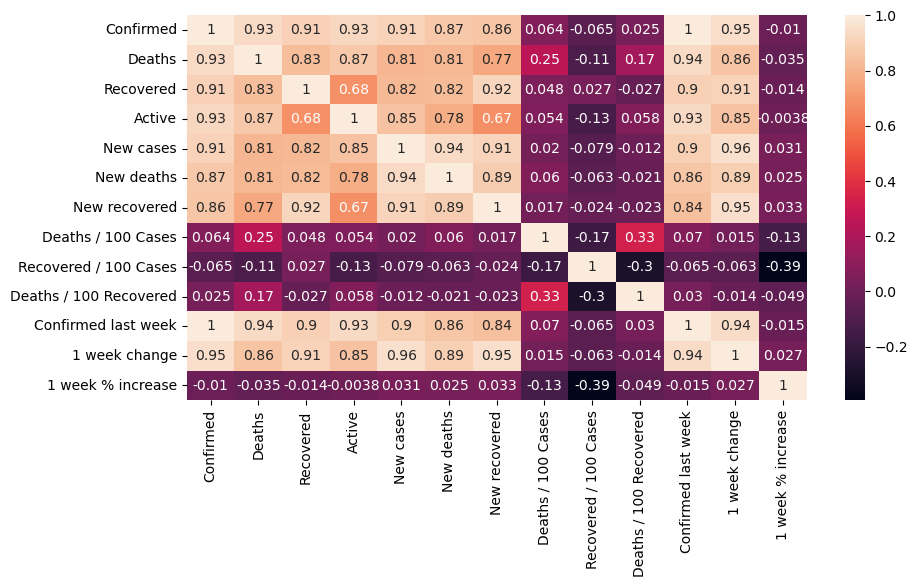

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only = True),annot=True)
plt.show()

## Inferential Statistics

In [15]:
df.skew(numeric_only = True)

Confirmed                  8.725676
Deaths                     7.464481
Recovered                  6.983644
Active                    12.182067
New cases                  7.720320
New deaths                 5.970033
New recovered              6.769567
Deaths / 100 Cases         3.352173
Recovered / 100 Cases     -0.823366
Deaths / 100 Recovered          NaN
Confirmed last week        8.865198
1 week change              7.692012
1 week % increase          6.114613
dtype: float64

* **0	              Perfectly symmetrical (normal)**
* **0.5 to 1	      Moderate positive skew**
* **>1	          Highly positively skewed**
* **-0.5 to -1	  Moderate negative skew**
* **<-1	          Highly negatively skewed**

In [17]:
df.kurt(numeric_only = True)

Confirmed                  86.096572
Deaths                     66.480494
Recovered                  55.600771
Active                    157.921665
New cases                  65.022330
New deaths                 40.101549
New recovered              47.910082
Deaths / 100 Cases         17.541183
Recovered / 100 Cases      -0.115728
Deaths / 100 Recovered           NaN
Confirmed last week        89.376884
1 week change              61.662738
1 week % increase          45.808865
dtype: float64

* **= 0 (excess)	Mesokurtic**
* **> 0	        Leptokurtic**
* **< 0	        Platykurtic**

In [18]:
#chi-square test and the P-value
education_crosstab = pd.crosstab(df['Confirmed'], df['Deaths'])
chi2_edu, p_edu, _, _ = stats.chi2_contingency(education_crosstab)
print(f"chi2:{chi2_edu},p-value:{p_edu}") 

<IPython.core.display.Javascript object>

chi2:27598.08333333333,p-value:0.07854642350413846


* **As we can see that the chi2 and p-value > 0.05,hence there is no significant relationship netween confirmed cased and deaths**

In [24]:
#confidence Interval
Death_ci = sms.DescrStatsW(df['Deaths']).tconfint_mean()
print(f"Death_ci",(Death_ci))

Death_ci (1463.3757649430665, 5531.661668212014)


* **This Confidence Interval value indicates that the average death rate is in the range of 1463 - 5531**

## Final Summary of Analysis

**1) As this Insights shows us that Highest death count on a single day happened in "Americas" due to Covid-19 with the death count of *148011*,Second highest is the "Europe" With *45844* deaths in particular day.**

**2) We have also FOund out that New cases are obtained highly from the coutries like south-East Asia and America.**

**3) If we look at tha data then we come to know that on an avg. "South East asia" has a highest death rates.**

**4) The ratio of Death_to_Recovered is high for the "Europe" which means it has higher death rates compared to recovered.**

**5) We can See that on an average the recovery rate of Americas are very high compared to other countries.**